<font size=6> <b> 4,5 주차 강의 Notebook </b> </font>
<div class="alert alert-block alert-success">
  클리앙 사이트에서 글을 scrap하고, 그 내용을 분석해 보자! <br>
</div>
<p style="text-align:right;"> sumyeon@gmail.com </p>

> pip install --upgrade pip
> pip install konlpy

 <hr>

# Preparation

In [1]:
import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

%matplotlib inline

# Data Scrap

 <hr>

# Data Loading

In [60]:
df = pd.read_csv("clien_park_aug_5to10.csv", sep='|', error_bad_lines=False, parse_dates=[3])

<div class="alert alert-block alert-info">
<b> Tip:</b> 앞서 배운대로 오류가 생길 경우, 무시할 수준이라고 판단된다면 error_bad_lines로 무시하고 loading </b>

</div>

In [3]:
df.head()

,board,articleid,title,create_time,author_id,author_ip,content,reply_cnt,symph_cnt,view_cnt
0,park,15242011,익스플로러가 느린 이유,2020-08-05 00:01:04,내일은$,218.♡.42.208,얼마전 초딩 아들이 어느 인터넷으로 공부하는 사이트를 사용하더니 저에게 묻습니다아들...,11,2,3208
1,park,15242012,수요일 자정 러블리즈 입니다. [8/4 단신] (데뷔로부터 2095일),2020-08-05 00:02:03,224-rainbow,115.♡.203.252,카메오(Musical Ver.) 작업 트랙 공개 & 분석(1)[공식] tvN 새 예...,14,10,496
2,park,15242014,제 나이는 여름에는 쿨 이었는데...,2020-08-05 00:02:19,화이트덕,125.♡.110.208,1.코요테가 이렇게 옛날 감성으로 돌아오니 좋네요.2.신지씨 특유의 음 끝 바이브레...,1,0,936
3,park,15242018,어느 여자사람의 셀프네일 도전기,2020-08-05 00:04:35,해리비안의 캐적,49.♡.102.42,클리앙에서 이과천재들의 전자기기 후기들을 보며 1도 이해할수 없는 용어의 홍수속에서...,51,24,11075
4,park,15242019,아이맥 2020 업데이트,2020-08-05 00:04:54,Daspfel,125.♡.240.232,27인치만 나왔네요. 예상대로 디자인 변화 없이 내부만 업데이트. 10 세대 인텔 ...,8,0,2014


In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth',1000)

<div class="alert alert-block alert-info">
<b> Tip:</b> pandas의 option 설정으로, Dataframe의 출력 갯수 및 컬럼 길이를 변화시켜 자연어 처리를 준비 </b>

</div>

In [61]:
df.iloc[5928]

board                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             park
articleid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

 <hr>

# 한글 NLP 패키지 로딩

In [62]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt, Mecab
from konlpy.utils import pprint

In [71]:
tagger = Okt() # Hannanum()  #Kkma()

<div class="alert alert-block alert-info">
<b> Tip:</b> 한글 처리 엔진은 여러 종류가 지원된다. 장단점을 살펴보고 가장 적합한 엔진을 선택하면 된다. </b> <br>
   엔진별 성능 비교  => https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221337575742 
</div>

<div class="alert alert-block alert-info">
<b> Tip:</b> 카카오에서 만든 Khaii라는 한글 처리기가 성능이 뛰어난 것으로 알려려 있음. 실전에 사용에 추천 (https://github.com/kakao/khaiii). </b>
</div>

 <hr>

# 통계 분석
 - title과 content에서 unpack과 관련된 내용을 찾아, 통계를 내어 보자

##  Title/Content를 하나의 content로 처리, whitespace 제거, URL 제거

In [64]:
df['all_content'] = df.apply(lambda row: '.'.join([str(row['title']), str(row['content'])]), axis=1 )


In [65]:
df['all_content'] = df['all_content'].apply(lambda x : re.sub(r'https?://\S+', '', str(x)))


In [66]:
df['all_content'] = df['all_content'].apply(lambda x: str(x).replace(u'\xa0', u' '))


## Title/Content에서 명사만을 뽑아보자

In [13]:
import ast
df = pd.read_csv("clien_park_aug_5to10_with_nouns.csv", converters={11:ast.literal_eval})

<div class="alert alert-block alert-info">
<b> Tip:</b> pd.read_csv를 이용해 저장된 데이터를 읽어올때, str으로 저장된 list를 복원하기 위해 Abstract Syntax Tree (ast)의 literaal_eval 활용 </b>
</div>

## 언팩과 관련된 단어 리스트를 만들고, 해당 단어가 나타나는 article을 찾아보자

In [74]:
filter_keywords = "노트20 note20 갤럭시노트 언팩 버즈 와치".split()

In [75]:
filter_keywords

['노트20', 'note20', '갤럭시노트', '언팩', '버즈', '와치']

In [76]:
df['interest_list'] = df['nouns'].apply(lambda nouns: [ (keyword in nouns) for keyword in filter_keywords])
df['interest'] = df['interest_list'].apply(lambda interest_list : np.sum(interest_list))

In [77]:
df['interest'] = df['nouns'].apply(lambda nouns: sum([ (keyword in nouns) for keyword in filter_keywords]))

<div class="alert alert-block alert-info">
<b> Tip:</b> 가독성을 위해 두 개의 sentence로 나누어 작업했으나, 아래와 같이 하나의 sentence로 처리 가능 </b> <br><br>
<pre>
  df['interest'] = df['nouns'].apply(lambda nouns: sum([ (keyword in nouns) for keyword in filter_keywords]))
</pre>
</div>

## 날짜별로 언팩 관련 article 비율 확인

In [78]:
df['create_time'] = pd.to_datetime(df['create_time'], infer_datetime_format=True)
df['date'] = df['create_time'].dt.date

In [79]:
statdf = df.groupby('date').agg(totalcnt=('interest','count'), galaxycnt=('interest',np.count_nonzero))
statdf

,totalcnt,galaxycnt
date,,
2020-08-05,2291,79
2020-08-06,2755,143
2020-08-07,2319,56
2020-08-08,1784,24
2020-08-09,1648,20
2020-08-10,1623,15


<AxesSubplot:xlabel='date'>

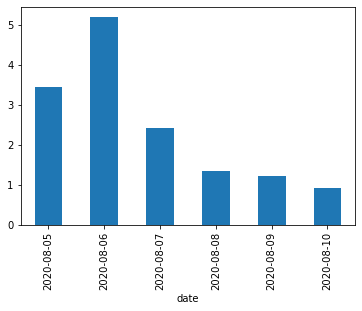

In [80]:
statdf['ratio'] = statdf['galaxycnt'] / statdf['totalcnt'] * 100
statdf['ratio'].plot(kind='bar')

## 언팩 관련 오피니언 리더 확인?

In [81]:
cntdf = df[ df.interest > 0].groupby('author_id').agg(cnt=('title','count')).sort_values(by='cnt', ascending=False)

In [82]:
cntdf.head(10)

,cnt
author_id,
fiat,9
도라에몽펀치,8
요트맨,7
이리야즈,7
그물새,6
또하나의가족,6
TIME_TRAVELER,4
SovereignLightCafe,4
쉭한도시남자,4


array([[<AxesSubplot:title={'center':'cnt'}>]], dtype=object)

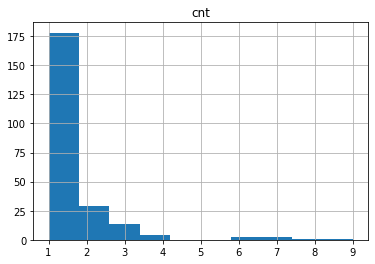

In [83]:

cntdf.hist()

##  언팩 관련 article의 긍부정 여부를 확인해 보자!
 - 한국어 감성 사전 ( https://github.com/park1200656/KnuSentiLex )을 활용해 보자

<b> 감성 사전의 내용 샘플 </b>
<pre>
[
{
	"word": "(-;",
	"word_root": "(",
	"polarity": "1"
},
{
	"word": "(;_;)",
	"word_root": "(;_;)",
	"polarity": "-1"
},
...
{
	"word": "(^^)",
	"word_root": "(^^)",
	"polarity": "1"
},
]
</pre>

<div class="alert alert-block alert-info">
<b> Tip:</b> 한국어 감성 사전을 활용, 긍정의 단어가 많은 경우 긍정의 article로 반대의 경우 부저의 article로 판단
</div>

<b> 감성 사전 데이터 로딩 </b>

In [84]:
import json
with open('SentiWord_info.json', encoding='utf-8', mode='r') as f:
    data = json.load(f)

<b> 단어 : 긍부정점수 형태의 dict 로 변환 </b>

In [85]:
polarity_dict = { item['word'] : item['polarity'] for item in data}

<b> 언팩 관련된 article만을 모아 별도의 Dataframe 구성 </b>

In [86]:
focusdf = df[ df.interest > 0]

<b> article내 단어들의 긍부정을 sum해서 article 전체의 긍부정 판단 </b>

In [87]:
focusdf['polarity'] = focusdf['nouns'].apply(lambda x : np.sum([ int(polarity_dict.get(noun, 0)) for noun in x]) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<b> 긍부정 점수의 histogram을 보자</b>

<AxesSubplot:>

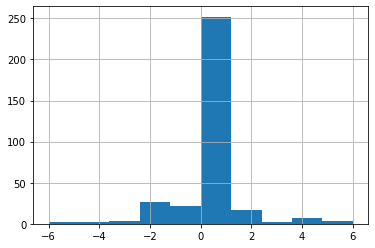

In [88]:
focusdf['polarity'].hist()

<b> 긍부정 점수로 긍정(positive), 부정 (negative), 중립 (neutral) 구성</b>

In [89]:
focusdf['sentiment'] = 'neutral'
focusdf['sentiment'] = focusdf['sentiment'].where( focusdf['polarity'] >= 0, 'negative' )
focusdf['sentiment'] = focusdf['sentiment'].where( focusdf['polarity'] <= 0, 'positive' )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<b> 긍부정으로 구분된 article의 갯수, 글쓴이 숫자 확인</b>

In [90]:
focusdf.groupby('sentiment').agg(article_cnt=('articleid','count'), author_cnt=('author_id','nunique'))

,article_cnt,author_cnt
sentiment,,
negative,56,51
neutral,224,166
positive,57,47


<AxesSubplot:xlabel='date'>

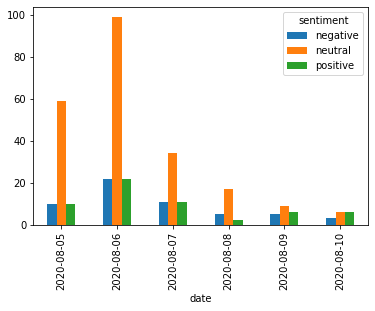

In [91]:
focusdf.groupby(['date','sentiment']).agg(article_cnt=('articleid','count'), author_cnt=('author_id','nunique')).unstack()['article_cnt'].plot(kind='bar')

<div class="alert alert-block alert-warning">
<b> Note:</b> 언팩 후에 negative 성향의 글들이 사라지고, positive한 효과가 나왔다. </b>
</div>

# Word Cloud 생성 (긍/부정의 중심 단어를 찾아보자)

## 긍정 성향의 article의 word cloud 생성

In [92]:
focusdf[ focusdf.sentiment == 'positive'].nouns.values[:3]

array([list(['갤럭시', '언팩', '것', '오늘', '밤', '11시', '시작이긴', '유출', '영상', '들', '싶습니다;;언팩에서', '가격', '사양', '확인', '출시', '일정', '발표', 'ㅎㅎ']),
       list(['갤럭시', '버즈', '라이브', '11번', '재유출(', '+', '예판', '혜택', '버즈', '라이브', '글', '이번', '끝', '거', '어제', '버즈', '라이브', '11번', '글', '어제', '글', '링크', '이', '검색', '줄', '꿈', '몇', '시간', '뒤', '버즈', '플러스', '줄', '전', '검색', '곳', '버즈', '라이브', ';;(네이버', '버즈', '플러스', '최고', '순', '정렬하시', '96만원', '담당자', '것', '링크', '모바일', '네이버', '검색', '버즈', '플러스', '검색', '최고', '96만원', '클릭하시', '가격', '경유', '1', '할인가격', '19.8', '것', '같구', '예판', '혜택', '케이스', '5', '할인쿠폰', '자세한', '거', '페이지', '참조']),
       list(['안드로이드', '플랫폼', '100', '만족', '불가능', '10년', '안드로이드', '1년', '외도', '안드로이드', '생각인데요', '안드로이드만', '죽', '때', '경직적', '자유도', '쓰레기', '정도', '인식', '장점', '눈', '시작', '미', '아주아주', '탭틱엔진', '촉감(알람앱', '다이얼', '때', '다들', '아실거에요', 'ㅎㅎ),', '듯', '지원', '기간', '등등', '좋은걸', '안드로이드', '이것들', '그리워지는거', '예전', '줄', '것들', '눈', '시작', '안드로이드', '때', '안드로이드', '뭔가', '부족', '다음폰', '노트21', '정도', '것', '데', '그때', '갤럭시노트', '기가막히', '

In [93]:
from itertools import chain
flat_words = list(chain( *(focusdf[ focusdf.sentiment == 'positive'].nouns.values)))

## 불용어 (stopword 제거)
 - 한국어 불용어 사전 ( https://www.ranks.nl/stopwords/korean )을 활용해서 불용어를 제거하자

In [94]:
stopwords = []
with open('korean_stopwords.txt','r', encoding='utf_8') as infile:
    for line in infile:
        stopwords.append(line.strip())

In [95]:
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [96]:
meaningful_words = [word for word in flat_words if word not in stopwords]

In [97]:
from collections import Counter
cnt = Counter(meaningful_words)
cnt.most_common(20)

[('버즈', 33),
 ('갤럭시', 32),
 ('노트20', 32),
 ('생각', 27),
 ('라이브', 26),
 ('사용', 22),
 ('언팩', 19),
 ('노트', 16),
 ('이', 15),
 ('삼성', 15),
 ('ㅎㅎ', 14),
 ('구매', 14),
 ('수', 12),
 ('오픈형', 12),
 ('가격', 11),
 ('데', 11),
 ('안드로이드', 10),
 ('3년', 10),
 ('T다이렉트샵', 10),
 ('노캔', 9)]

## 단어:발생횟수 형태의 dict 생성

In [98]:
tags = {word:count for (word,count) in cnt.most_common(50)}

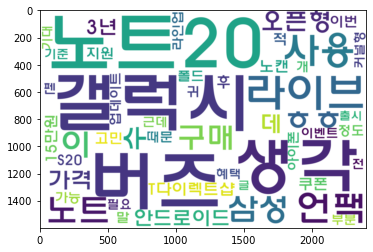

In [114]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',font_path='C:\\WINDOWS\\Fonts\\HYWULM.TTF',  width=1200, height=800, scale=2.0, max_font_size=250)
gen =wc.generate_from_frequencies(tags)
plt.imshow(gen, interpolation='bilinear')

# 클러스터링

## sentence를 vector화 하자

In [103]:
from gensim.test.utils import common_texts

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [104]:
documents = [ TaggedDocument(row[12],[row[0]]) for row in focusdf.itertuples()]

In [105]:
model = Doc2Vec(documents, vector_size=50)

In [106]:
focusdf['vec'] = focusdf['nouns'].apply(lambda x: model.infer_vector(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Clustering

In [108]:
# Number of cluster chosen is 3 based on Elbow Method, please check the full code for it
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
focusdf['cluster'] = kmeans.fit_predict(focusdf['vec'].values.tolist())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [109]:
focusdf.groupby('cluster').agg(cnt=('nouns','count'))

,cnt
cluster,
0,162
1,47
2,19
3,4
4,105


In [113]:
focusdf[focusdf.cluster == 0][['title','content']]

,title,content
31,노트20 제정신인가요?.jpg,120만원 가격 책정해놓고 노트9에 썼던 디스플레이 주사율 60너프 뒷면 플라스틱 기본앱에 광고까지 집어넣고 os업뎃은 2번이면 끝나고 플래그쉽 급나누기는 중국보다 심하네요 화웨이도 저러지는 않을테데;;; s10 놋10이 잘만든거였어요 ㅋㅋㅋㅋ 정점을 찍고 급추락
399,"갤 노트20 ‘리뷰’ 영상, 언팩 25시간 전 유튜브에…관리의 삼성 ‘구멍’.gisa","http://www.m-i.kr/news/articleView.html?idxno=735276이로써 알려진 사실모서리가 둥글게 처리, 펀치홀 더 큼, 뒷면 플라스틱 재질, 구형 AMOLED 사용, 120hz 미지원 등등노트20은 노트20 울트라와 완전히 급이 다른걸로 확인.... 노트20 라이트라고 불러야 할것 같네요."
488,갤럭시 언팩 직전이라 그런가 사진 다 떠버리네요 -0-,그래도 폴드2 사진은 없ㅋ엉ㅋ..젤 보고 싶은놈이 없근영..
576,노트20 시리즈 실기사진 모음.jpg,evan blass 트위터를 통해 공개되었네요.https://twitter.com/evleaks/status/1290814720933601282?s=20
1460,S7을 사용중이라.. 바꿀때가 되었는데..,노트20 나오면 사야지! 했는데...유출되는거 보니사고싶다라는 생각이..싹..... ㄷㄷㄷㄷ갤20+를 샀어야 했는데...어차피 자급제 구매해야하는데.지금 사자니 웃돈 주고 사는 느낌이고... 이렇게된거.. 내년상반기 s21..
...,...,...
10708,버즈 라이브 통품이 버즈 플러스보다 좀 더 낫나보네요,유튜브에서 비교한거 쭉 보니까 버즈라이브쪽이 좀 더 괜찮은듯.. 버즈 플러스도 나쁜 편은 아니었는데
10868,"침착맨, 조이, 주연(유튜버) - 노트20 홍보영상.youtube",조이 성공했네요...무례이맨도 만나고...그나저나 매 장면마다 킹받는 표정 정말 ㅂㄷㅂㄷ
10954,노트20 울트라 예약구매 했습니다.,"총 상품 가격1,452,000원 할인금액0원 카드즉시할인- 188,760원 배송비0원 총 결제금액 1,263,240원이렇게 뜨는군요.. 딱 한달만 쓰고 폴드2 출시후 그거 사고 노트20은 여친(마누라[진]) 주기로했습니다...;;기다려지는군요 헉헉"
11116,[드림] 티다 노트20 15만원 할인쿠폰,필요하신 분만 댓글 주세요.선착순한 분 쪽지로 쿠폰번호 드릴께요.


##  Visualization - PCA

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
focusdf['x'] = pca.fit_transform(focusdf['vec'].values.tolist())[:,0]
focusdf['y'] = pca.fit_transform(focusdf['vec'].values.tolist())[:,1]
focusdf['z'] = pca.fit_transform(focusdf['vec'].values.tolist())[:,2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

## Visualization - 2d

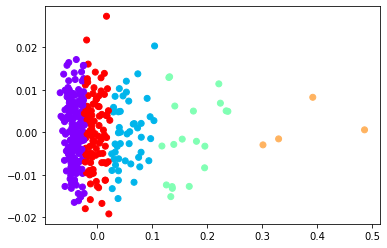

In [117]:
import matplotlib.pyplot as plt

plt.scatter(focusdf['x'], focusdf['y'], c=focusdf['cluster'], cmap='rainbow')

## Visualization - 3d

Text(0.5, 0.92, 'Clien Article Clustering (using K Means)')

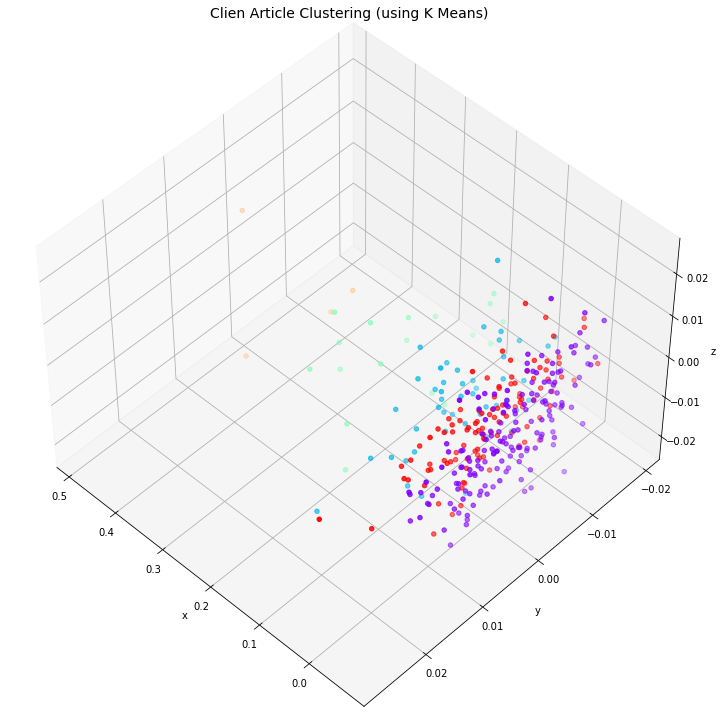

In [120]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(focusdf['x'],focusdf['y'],focusdf['z'], c=focusdf['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Clien Article Clustering (using K Means)", fontsize=14)

## Cluster Common words

In [124]:
cluster_flatwords = {}
for cluster_num in focusdf['cluster'].unique():
    cluster_flatwords[cluster_num] = list(chain( *(focusdf[ focusdf.cluster == cluster_num].nouns.values)))

In [127]:
for cluster_num in cluster_flatwords.keys():
    cluster_flatwords[cluster_num] = [word for word in cluster_flatwords[cluster_num] if word not in stopwords]

In [128]:
cluster_counters = {}
for cluster_num in cluster_flatwords.keys():
    cluster_counters[cluster_num] = Counter(cluster_flatwords[cluster_num])

In [130]:
for cluster_num in cluster_counters.keys():
    print(cluster_num)
    print(cluster_counters[cluster_num].most_common(10))

0
[('노트20', 79), ('언팩', 59), ('버즈', 58), ('라이브', 43), ('갤럭시', 26), ('삼성', 24), ('울트라', 16), ('폴드2', 16), ('케이스', 14), ('카툭튀', 13)]
4
[('노트20', 64), ('버즈', 34), ('언팩', 31), ('라이브', 29), ('삼성', 24), ('울트라', 21), ('갤럭시', 17), ('노트', 15), ('케이스', 15), ('구매', 15)]
1
[('버즈', 35), ('노트20', 30), ('라이브', 26), ('생각', 19), ('삼성', 19), ('갤럭시', 18), ('소리', 15), ('노트', 14), ('수', 13), ('이', 13)]
2
[('카메라', 20), ('라이브', 19), ('버즈', 18), ('갤럭시', 17), ('삼성', 16), ('노트20', 16), ('거', 14), ('수', 14), ('프로', 13), ('생각', 13)]
3
[('사용', 14), ('생각', 12), ('T다이렉트샵', 8), ('쿠폰', 8), ('노트20', 7), ('갤럭시', 6), ('3년', 6), ('삼성', 6), ('지원', 5), ('이', 5)]
